# Character Classifier Using A Deep Convolutional Neural Network
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load MNIST Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

In [1]:
# Load MNIST Dataset
from tensorflow.examples.tutorials.mnist import input_data

# Save MNIST Dataset
mnist = input_data.read_data_sets("MNIST_data/", reshape=False)

# Save training, validation, and test sets
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

# Verify that number of images in each set matches the number of labels in the same set
assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

# Print out the assertion results
print()
print("The training, validation, and testing feature sets lengths match the their corresponding label sets")

# Print out the shape of one image so that we know what the dimensions of the data are
print()
print("Image Shape: {}".format(X_train[0].shape))
print()

# Print out the size of each set
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

The training, validation, and testing feature sets lengths match the their corresponding label sets

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).


In [2]:
import numpy as np

# Pad images with 0s
# Transform 28x28 images into 32x32 images (by adding padding) that LeNet can process
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


## Visualize Data

View a sample from the dataset.


Indices: 3273, 4058, 44654, 3273, 4058, 44654


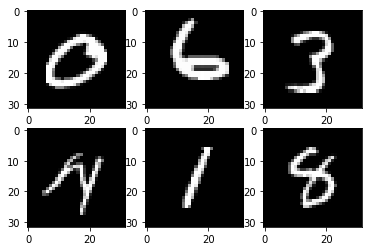

In [3]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Select random images from training set so we can
# see the size of our data, and print out the labels
index1 = random.randint(0, len(X_train))
image1 = X_train[index1].squeeze()
index2 = random.randint(0, len(X_train))
image2 = X_train[index2].squeeze()
index3 = random.randint(0, len(X_train))
image3 = X_train[index3].squeeze()
index4 = random.randint(0, len(X_train))
image4 = X_train[index4].squeeze()
index5 = random.randint(0, len(X_train))
image5 = X_train[index5].squeeze()
index6 = random.randint(0, len(X_train))
image6 = X_train[index6].squeeze()

# Plot randomly selected images from training set
fig = plt.figure()
print("Indices: "+str(index1) +", "+str(index2)+", "+str(index3)+", "+str(index1) +", "+str(index2)+", "+str(index3))
fig.add_subplot(2,3,1)
plt.imshow(image1.squeeze(), cmap="gray")
fig.add_subplot(2,3,2)
plt.imshow(image2.squeeze(), cmap="gray")
fig.add_subplot(2,3,3)
plt.imshow(image3.squeeze(), cmap="gray")
fig.add_subplot(2,3,4)
plt.imshow(image4.squeeze(), cmap="gray")
fig.add_subplot(2,3,5)
plt.imshow(image5.squeeze(), cmap="gray")
fig.add_subplot(2,3,6)
plt.imshow(image6.squeeze(), cmap="gray")

## Preprocess Data

Shuffle the training data so that the model does not rely on the order of the data

In [4]:
from sklearn.utils import shuffle

# Shuffle the training set so that we never train in the same order
# This is important because we don't want to have to rely on the ordering of data
X_train, y_train = shuffle(X_train, y_train)

print("Data has been shuffled")

Data has been shuffled


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.


In [5]:
import tensorflow as tf

# Start building DNN

# EPOCHS tells TF how many times to run our training data through the network
# The more EPOCHS, the better our model will train but also the longer it will take
EPOCHS = 10

# Tells TF how many taining images to run through the network at a time
# The larger the batch_size, the faster the model will train,
# but our processer may have a limit on how large of a batch it can run
BATCH_SIZE = 128

print("We will train on",EPOCHS,"with a batch size of",BATCH_SIZE)

We will train on 10 with a batch size of 128


## Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [6]:
from tensorflow.contrib.layers import flatten

def Character_Classifier(x):    
    # Arguments used for tf.truncated_normal,
    # randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # This layer has a 5x5 filter with an input depth of 1 and an output depth of 6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)) #Weights
    conv1_b = tf.Variable(tf.zeros(6)) #Biases
    # Now we use the conv2d function to convolve the filter over the images, and we add the baises at the end
    # The formula for convolutions tells us that the output height = the input height minus the filter height + 1
    # all divided by the vertical stride. In this case: (32 - 5 + 1)/1 = 28 (This also works for output width)
    # Convolutional layer output = 28x28x6
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    # Activate the output of the convollutional layer (28x28x6) with a ReLU activation function
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    # Pool the output using a 2x2 kernel with a 2x2 stride which gives us a pooling output of 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    # The network then runs through another set of convolutional activation and pooling layers giving and output of 5x5x16
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    # We then flatten this output (5x5x16) into a vector of length 5x5x16 which equals 400
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    # We pass our last output into this fully connected layer with a width of 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    # We apply a ReLU activation to the ouput of the fully connected layer
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # We repeat this pattern, but this time for a layer with width 84
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    # Finally, we attach a fully connected output layer with a width equal to
    # the number of classes in our label set, in this case: 10, one for each digit
    # The width of the output layer is 10. This output is also known as our logits that we return
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

print("The Character Classifier model has been defined")

The Character Classifier model has been defined


## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [7]:
# Here we set up our tensorFlow variables

# x is a placeholder that will store our input batches
# We initialize the batch size to none which allows the placeholder to
# later accept a batch of any size, and we set the image dimensions to 32x32x1
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

# y stores our labels in this case our labels come through with sparse variables
# which just means that they are integers, they aren't one-hot encoded yet
y = tf.placeholder(tf.int32, (None))

# We use the tf.ont_hot() function to one-hot encode the labels
one_hot_y = tf.one_hot(y, 10)

print("The variable x will hold our input batches")
print("The variable y will hold our labels")
print("The variable one_hot_y will encode each label with a numeric id")

The variable x will hold our input batches
The variable y will hold our labels
The variable one_hot_y will encode each label with a numeric id


## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.


In [8]:
# Now we can set up our training pipeline

# The learning rate tells tf how quickly to update the networks weights
rate = 0.001

# We pass the input data to the LeNet function to calculate our logits
logits = Character_Classifier(x)

# We use the below function to compare our logits to the ground truth labels
# and calculate the cross entropy (a measure of how different the different
# the logits are from the ground truth training labels)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# The tf reduced mean function averages the cross entropy from all the training images
loss_operation = tf.reduce_mean(cross_entropy)

# Adam optimizer uses an algorithm to minimize the loss function
# Similar to stochastic gradient descent, but a little more complex
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

# We run the minimize function on the optimizer which uses back propagation
# to update the network and minimize our training loss
training_operation = optimizer.minimize(loss_operation)

print("Training pipeline defined")

Training pipeline defined


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [9]:
# In this code cell we set up another pipeline, this time for evaluating the model
# The training pipeline above trains the model, but the evaluation pipeline
# we create here will evaluate how good the model is

# The first step is to measure whether a given prediction is correct by
# comparing the logit prediction to the one-hot encoded ground truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# The second step in the pipeline is to compute the models overall accuracy
# by averaging the individual prediction accuracies 
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# We use the evaluate function to run evaluation pipeline
# The function takes a dataset as input. It averages the accuracy of each
# batch to calculate the total accuracy of the model
def evaluate(X_data, y_data):
    # It sets some initial variables
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    # Batches the data set and runs it through the evaluation pipeline
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print("Evaluation method defined")

Evaluation method defined


## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [10]:
# Now that everything else is set up we can build a function to train and
# validate our model

# First we create the TF session and initialize the variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    # We train over whatever number of EPOCHs has been set
    for i in range(EPOCHS):
        # At the beginning of each EPOCH we shuffle our training data to
        # ensure that our training isn't bias by the order of the images
        X_train, y_train = shuffle(X_train, y_train)
        # Then we break our training data into batches and train the model on each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        # At the end of each EPOCH we evaluate the model on our validation data
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    # Once we have completely trained the model we save it so that
    # we can load it up later and modify it, or evaluate it on our test dataset
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.107

EPOCH 2 ...
Validation Accuracy = 0.113

EPOCH 3 ...
Validation Accuracy = 0.098

EPOCH 4 ...
Validation Accuracy = 0.096

EPOCH 5 ...
Validation Accuracy = 0.113

EPOCH 6 ...
Validation Accuracy = 0.110

EPOCH 7 ...
Validation Accuracy = 0.099

EPOCH 8 ...
Validation Accuracy = 0.113

EPOCH 9 ...
Validation Accuracy = 0.113

EPOCH 10 ...
Validation Accuracy = 0.113

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.


In [11]:
# This last code cell evaluates the model on our test data set

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    validation_accuracy = evaluate(X_validation, y_validation)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Test Accuracy = 0.114
Validation Accuracy = 0.113
